In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import cv2
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import plot_confusion_matrix, confusion_matrix ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.filters import gaussian as gsn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing, metrics, svm
from threading import Thread
import xgboost 
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
DIRECTORY = r'C:\Users\levi_\train'
IMG_SIZE = 50

In [3]:
x = []
y = []
for img_name in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img_name)
    x.append(cv2.imread(img_path))
    y.append(img_name.split('.')[0])
y = np.array(y)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)

In [5]:
img_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.1, random_state=42, shuffle=True,
                                                      stratify=y_encoded)

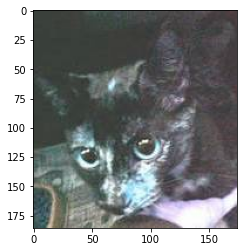

In [6]:
plt.imshow(img_train[15250])

In [7]:
def images_trans(img_lst):
    new_img_lst = []
    
    for img in img_lst:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(gray_img, (IMG_SIZE, IMG_SIZE))
        # trans_img = preprocessing.normalize(img_arr)
        new_img_lst.append(img_arr)
    
    return new_img_lst

In [8]:
final_img_train = images_trans(img_train)
final_img_train = np.array(final_img_train)

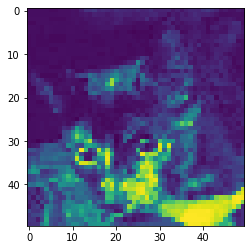

In [9]:
plt.imshow(final_img_train[15250])

In [10]:
final_img_train = final_img_train.reshape(22500,2500)

In [11]:
df = pd.DataFrame(final_img_train)
df

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,151,155,161,163,164,168,172,173,177,179,...,231,227,225,226,209,206,193,188,190,175
1,66,70,71,74,76,77,46,153,99,98,...,87,80,90,73,95,103,97,104,98,118
2,175,177,183,182,187,210,220,223,189,184,...,145,145,198,68,124,173,81,110,185,159
3,59,62,64,71,72,73,77,79,80,82,...,135,108,122,127,120,104,90,98,85,77
4,45,67,60,22,22,24,24,6,25,69,...,226,229,224,200,222,221,221,218,217,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,42,44,169,169,198,180,241,142,212,70,...,77,122,194,140,23,25,220,228,169,24
22496,158,156,156,155,155,159,159,160,163,160,...,99,111,158,154,57,89,160,119,141,135
22497,63,62,58,58,60,59,63,58,64,65,...,126,126,127,136,147,146,146,143,144,141
22498,42,44,46,50,50,51,54,55,56,55,...,96,88,22,50,75,96,100,63,7,59


In [12]:
def conf_matrix(train,predict):
    cm = confusion_matrix(train,predict)
    cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_df, annot=True ,fmt = 'g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

# Evaluating a model without using PCA:

Gradient boosting

0.6576444444444445


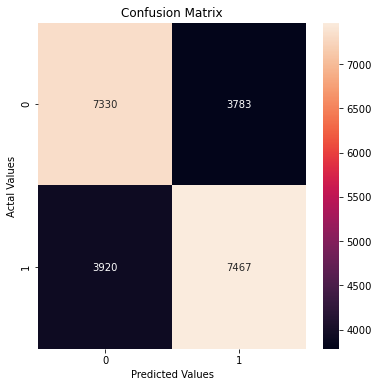

In [13]:
booster = GradientBoostingClassifier(learning_rate=0.3, n_estimators=170, warm_start=True)
m_predict = cross_val_predict(booster, df,y_train, cv=3)
print(accuracy_score(m_predict,y_train))
conf_matrix(m_predict,y_train)

Random Forest

0.6447111111111111


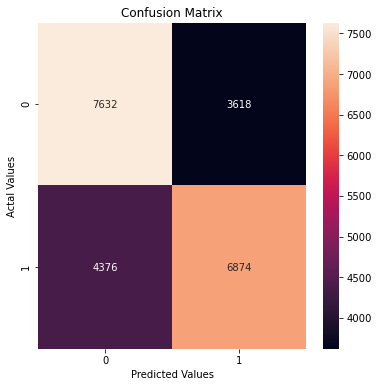

In [14]:
rndf_clf = RandomForestClassifier(n_estimators=300)
m_predict = cross_val_predict(rndf_clf, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

XGBoost

0.6564888888888889


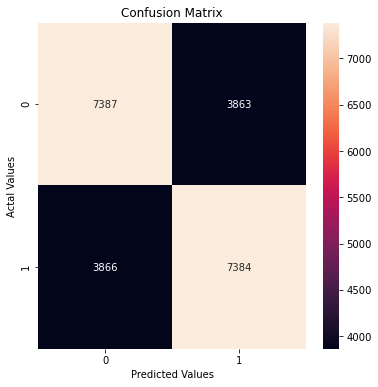

In [15]:
xg = xgboost.XGBClassifier()
m_predict = cross_val_predict(xg, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

Voting Classifier

0.6716444444444445


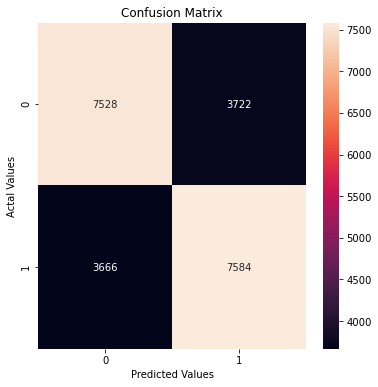

In [16]:
voting = VotingClassifier(estimators = [('mdl1 '  , booster) , ('mdl2 '  , rndf_clf) , ('mdl3 '  , xg)] , voting = 'soft')
m_predict = cross_val_predict(voting, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

As we can see a voting model performed better than every model we tested

# We are going to evaluate couple of models using PCA and Scaling

In [17]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
pca = PCA(n_components=250)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

Gradient boosting

0.6335555555555555


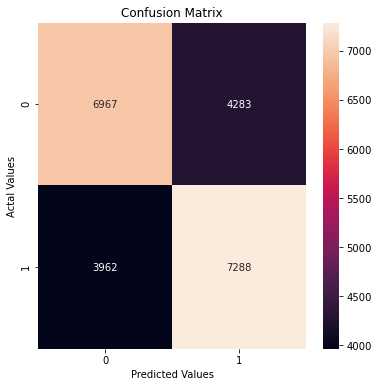

In [18]:
booster = GradientBoostingClassifier(learning_rate=0.25, n_estimators=170, warm_start=True)
m_predict = cross_val_predict(booster, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

Random Forest

0.6250222222222223


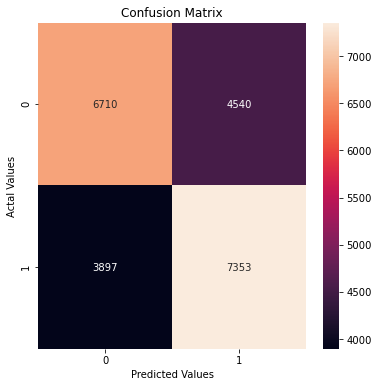

In [19]:
rndf_clf = RandomForestClassifier(n_estimators=300)
m_predict = cross_val_predict(rndf_clf, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

XGBoost

0.6234666666666666


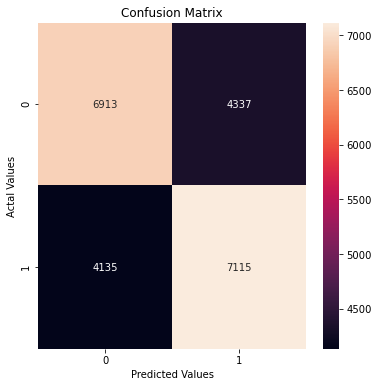

In [20]:
xg = xgboost.XGBClassifier()
m_predict = cross_val_predict(xg, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

Voting Classifier

0.6401333333333333


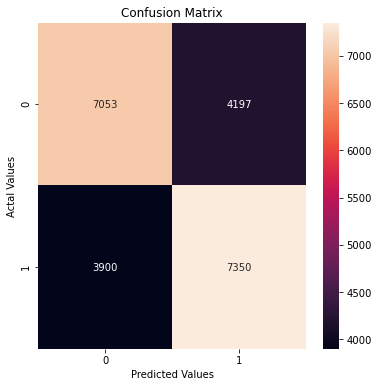

In [21]:
voting = VotingClassifier(estimators = [('mdl1 '  , booster) , ('mdl2 '  , rndf_clf) , ('mdl3 '  , xg)] , voting = 'soft')
m_predict = cross_val_predict(voting, df,y_train , cv=3)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

From all of the models above we can conclude that using PCA causes us to lose variance therefore lowering the accuracy score of the models. I will use the data without scaler nor with PCA.

# We will check each pixel importance of Random Forest :

<Figure size 360x360 with 0 Axes>

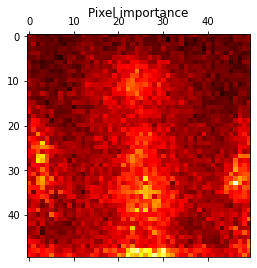

In [22]:
rndf_clf.fit(final_img_train,y_train)
img_shape = final_img_train[0].reshape(50,50).shape
importances = rndf_clf.feature_importances_
imp_reshaped = importances.reshape(img_shape)
plt.figure(figsize = (5,5))
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importance")
plt.show()

We can see that each pixel is at the same importance. Therefore the model will find it hard to make prediction whether is a cat or a dog.

# Predicting our test set

I will take the data without the pca, and the voting model for the best predictions:

In [23]:
df = pd.DataFrame(final_img_train)
voting.fit(df,y_train)

VotingClassifier(estimators=[('mdl1 ',
                              GradientBoostingClassifier(learning_rate=0.25,
                                                         n_estimators=170,
                                                         warm_start=True)),
                             ('mdl2 ',
                              RandomForestClassifier(n_estimators=300)),
                             ('mdl3 ',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fal...
                                            importance_type=None,
                                     

In [24]:
final_img_test = images_trans(x_test)
final_img_test = np.array(final_img_test)
final_img_test = final_img_test.reshape(2500,2500)

0.6401333333333333


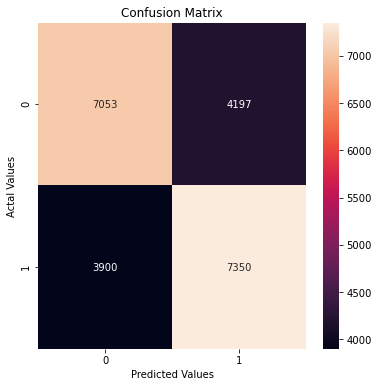

In [25]:
predicts = voting.predict(final_img_test)
print(accuracy_score(y_train,m_predict))
conf_matrix(y_train,m_predict)

## Understanding the confusion:

In [38]:
cl_a, cl_b = 0, 1
X_aa = final_img_test[(y_test == cl_a) & (predicts == cl_a)]
X_ab = final_img_test[(y_test == cl_a) & (predicts == cl_b)]
X_ba = final_img_test[(y_test == cl_b) & (predicts == cl_a)]
X_bb = final_img_test[(y_test == cl_b) & (predicts == cl_b)]

In [39]:
def plot_anim(instances, images_per_row=10, **options):
    size = 50
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

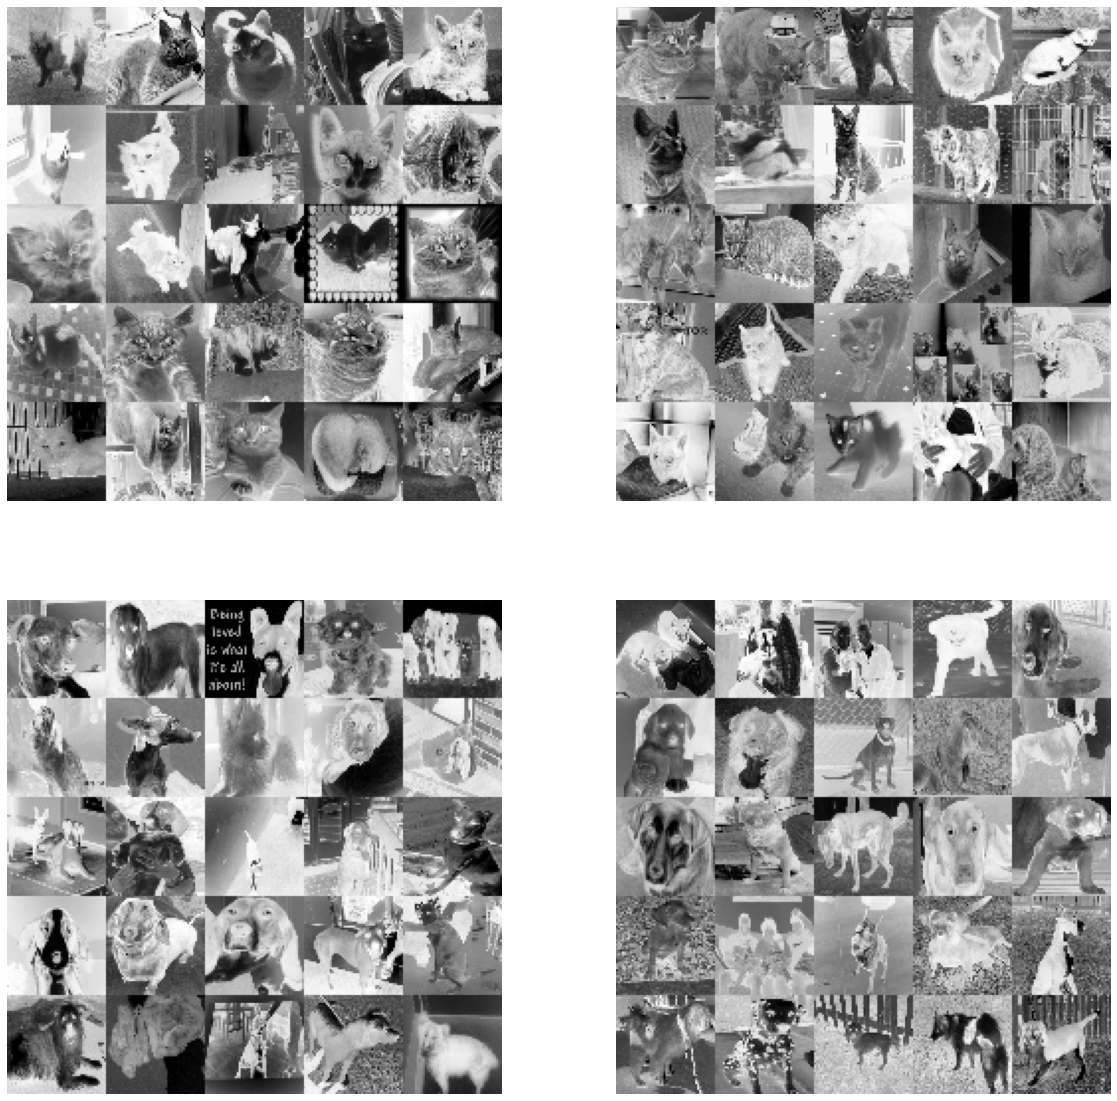

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(221); plot_anim(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_anim(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_anim(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_anim(X_bb[:25], images_per_row=5)
plt.show()

As we saw earlier, each pixel importance is almost the same. Consequently, it makes it hard for the model to decide whether it is a cat or a dog